In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.optimize import curve_fit
import scipy as sp


In [290]:
#IMPORTING DATA
data_frame_f = pd.read_csv('/Users/sydneyperkins/Downloads/111b OPT Data - CSV.csv')
data_frame_error_f = pd.read_csv('/Users/sydneyperkins/Downloads/111b OPT Data - Errors.csv')
data_frame_f.loc[len(data_frame_f)] = [0, -.34,-.21]
data_frame_f = data_frame_f.reset_index(drop=True)
data_frame_f.at[1, 'Current (FWD) (87) (A)'] = .25


#REMOVING BAD DATA
data_frame = data_frame_full.drop(index=[25,26, 27]).reset_index(drop=True)
data_frame_error = data_frame_error_full.drop(index=[25,26, 27]).reset_index(drop=True)

#MAKING NUMPY ARRAYS
I = np.array(data_frame['Current (FWD) (87) (A)'])
freq_87 = np.array(data_frame['Freq (MHz) (87)'])
freq_85 = np.array(data_frame['Freq (Inc R) (Hz) (85)'])
error_87 = np.array(data_frame_error['Error (87)'])
error_85 = np.array(data_frame_error['Error (85)'])
print(data_frame_error)
print(data_frame)

#MAKING NUMPY ARRAYS
I_f = np.array(data_frame_f['Current (FWD) (87) (A)'])
freq_87_f = np.array(data_frame_f['Freq (MHz) (87)'])
freq_85_f = np.array(data_frame_f['Freq (Inc R) (Hz) (85)'])
error_87_f = np.array(data_frame_error_f['Error (87)'])
error_85_f = np.array(data_frame_error_f['Error (85)'])
print(data_frame_error_f)
print(data_frame_f)

    Error (87)  Error (85)
0      0.00250      0.0010
1      0.00250      0.0010
2      0.00500      0.0010
3      0.00250      0.0010
4      0.00250      0.0025
5      0.00250      0.0010
6      0.00250      0.0025
7      0.00500      0.0025
8      0.00250      0.0025
9      0.01375      0.0025
10     0.00250      0.0025
11     0.00500      0.0025
12     0.00250      0.0050
13     0.00250      0.0025
14     0.00250      0.0025
15     0.00100      0.0050
16     0.00100      0.0025
17     0.00750      0.0025
18     0.00250      0.0010
19     0.00250      0.0010
20     0.00250      0.0025
21     0.00250      0.0010
22     0.00250      0.0010
23     0.00250      0.0010
24     0.00100      0.0010
    Current (FWD) (87) (A)  Freq (MHz) (87)  Freq (Inc R) (Hz) (85)
0                    0.100          0.63250                 0.41700
1                    0.150          1.10250                 0.73000
2                    0.400          1.55500                 1.03000
3                    0.550

In [304]:
#f_87 = 3.13*(I) + .271
#f_85 = 2.06*(I) + .161
m_85, b_85 = np.polyfit(I, freq_85,1)  # Degree 1 for linear
m_87, b_87 = np.polyfit(I, freq_87, 1)  # Degree 1 for linear

f_85f_stats = sp.stats.linregress(I_f, freq_85_f)  # Degree 1 for linear
f_87f_stats = sp.stats.linregress(I_f, freq_87_f)  # Degree 1 for linear

f_85_stats = sp.stats.linregress(I, freq_85)  # Degree 1 for linear
f_87_stats = sp.stats.linregress(I, freq_87)  # Degree 1 for linear



print("Slope 85:", m_85)
print("Intercept 85:", b_85)
print("Slope 87:", m_87)
print("Intercept 87:", b_87)

LinregressResult(slope=np.float64(2.0739641129005757), intercept=np.float64(0.16435589912134638), rvalue=np.float64(0.9992454764836537), pvalue=np.float64(3.2477950335010046e-38), stderr=np.float64(0.015809270245307108), intercept_stderr=np.float64(0.01641034697569657)) LinregressResult(slope=np.float64(3.1317207524218094), intercept=np.float64(0.24005849174283822), rvalue=np.float64(0.999174819940189), pvalue=np.float64(1.0394530388849285e-37), stderr=np.float64(0.024966325264878554), intercept_stderr=np.float64(0.02591555802054656)) LinregressResult(slope=np.float64(2.0765998656327467), intercept=np.float64(0.1936516285250365), rvalue=np.float64(0.9997766507459852), pvalue=np.float64(4.909703639881325e-40), stderr=np.float64(0.009153114887053653), intercept_stderr=np.float64(0.010047956676953448)) LinregressResult(slope=np.float64(2.0765998656327467), intercept=np.float64(0.1936516285250365), rvalue=np.float64(0.9997766507459852), pvalue=np.float64(4.909703639881325e-40), stderr=np.f

In [306]:
print(f_85f_stats)

LinregressResult(slope=np.float64(2.0739641129005757), intercept=np.float64(0.16435589912134638), rvalue=np.float64(0.9992454764836537), pvalue=np.float64(3.2477950335010046e-38), stderr=np.float64(0.015809270245307108), intercept_stderr=np.float64(0.01641034697569657))


In [307]:
print( f_87f_stats)

LinregressResult(slope=np.float64(3.1317207524218094), intercept=np.float64(0.24005849174283822), rvalue=np.float64(0.999174819940189), pvalue=np.float64(1.0394530388849285e-37), stderr=np.float64(0.024966325264878554), intercept_stderr=np.float64(0.02591555802054656))


In [308]:
print(f_85_stats)


LinregressResult(slope=np.float64(2.0765998656327467), intercept=np.float64(0.1936516285250365), rvalue=np.float64(0.9997766507459852), pvalue=np.float64(4.909703639881325e-40), stderr=np.float64(0.009153114887053653), intercept_stderr=np.float64(0.010047956676953448))


In [340]:
print(f_87_stats)


LinregressResult(slope=np.float64(3.1355801038016766), intercept=np.float64(0.28205854086466303), rvalue=np.float64(0.9996906343377018), pvalue=np.float64(2.0796116680519314e-38), stderr=np.float64(0.01626693828164543), intercept_stderr=np.float64(0.01785725331076474))


In [337]:
from scipy.stats import norm

measured_slope_85 = 2.0765998656327467
slope_error_85 = 0.1936516285250365

# Two theoretical constants
I_87 = 1.4755
I_85 = 2.5016

I_87_potential =12.3664909091/(2 * I_87 + 1)
I_85_potential = 12.3664909091/(2 * I_85 + 1)

# z-scores
z1_85 = (measured_slope_85 - I_87_potential) / slope_error_85
z2_85 = (measured_slope_85 - I_85_potential) / slope_error_85

# p-values (two-tailed)
p1_85 = 2 * norm.sf(abs(z1_85))
p2_85 = 2 * norm.sf(abs(z2_85))

print(f"Comparison to C87: z = {z1_85:.2f}, p = {p1_85:.4f}")
print(f"Comparison to C85: z = {z2_85:.2f}, p = {p2_85:.4f}")

Comparison to C87: z = -5.44, p = 0.0000
Comparison to C85: z = 0.09, p = 0.9316


In [338]:
measured_slope_87 =3.1355801038016766
slope_error_87 = 0.28205854086466303

# Two theoretical constants

I_87_potential =12.3664909091/(2 * I_87 + 1)
I_85_potential = 12.3664909091/(2 * I_85 + 1)

# z-scores
z1_87 = (measured_slope_87 - I_87_potential) / slope_error_87
z2_87 = (measured_slope_87 - I_85_potential) / slope_error_87

# p-values (two-tailed)
p1_87 = 2 * norm.sf(abs(z1_87))
p2_87 = 2 * norm.sf(abs(z2_87))

print(f"Comparison to C87: z = {z1_87:.2f}, p = {p1_87:.4f}")
print(f"Comparison to C85: z = {z2_87:.2f}, p = {p2_87:.4f}")

Comparison to C87: z = 0.02, p = 0.9841
Comparison to C85: z = 3.81, p = 0.0001


In [319]:
f_87_f = 3.1317207524218094*(I_f) + 0.24005849174283822
f_85_f = 2.0739641129005757*(I_f) + 0.16435589912134638
residual_87 = freq_87_f - f_87_f
residual_85 = freq_85_f - f_85_f

In [315]:
n= len(I)
RSS_85 = np.sum(residual_85**2)                  # Residual sum of squares
Sxx = np.sum((I - (np.mean(I)))**2)              # Spread of x

# Step 3: Residual standard error
residual_std_error_85 = np.sqrt(RSS_85 / (n - 2))  # σ

# Step 4: Standard errors
slope_error_85 = residual_std_error_85 / np.sqrt(Sxx)
intercept_error_85 = residual_std_error_85 * np.sqrt(1/n + (np.mean(I)**2) / Sxx)

RSS_87 = np.sum(residual_87**2)                  # Residual sum of squares
Sxx = np.sum((I - (np.mean(I)))**2)              # Spread of x

# Step 3: Residual standard error
residual_std_error_87 = np.sqrt(RSS_87 / (n - 2))  # σ

# Step 4: Standard errors
slope_error_87 = residual_std_error_87 / np.sqrt(Sxx)
intercept_error_87 = residual_std_error_87 * np.sqrt(1/n + (np.mean(I)**2) / Sxx)

print("Slope Error 85:", slope_error_85)
print("Intercept Error 85:", intercept_error_85)

print("Slope Error 87:", slope_error_87)
print("Intercept Error 87:", intercept_error_87)

Slope Error 85: 0.01682823212700643
Intercept Error 85: 0.018473421283178706
Slope Error 87: 0.02657549086051669
Intercept Error 87: 0.029173607469183595


In [316]:
print(f_85, f_87)

[ 0.37175231  0.68284693  0.99394154  1.30503616  1.61613078  1.9272254
  2.23832001  2.54941463  2.86050925  3.18197368  3.48269848  3.7937931
 -3.44434166 -3.25768489 -3.05028848 -2.84289206 -2.63549565 -2.32440104
 -2.01330642 -1.7022118  -1.39111719 -1.08002257 -0.76892795 -0.45783333
 -0.14673872  0.06065769  0.1643559   0.1643559 ] [ 0.55323057  1.02298868  1.49274679  1.96250491  2.43226302  2.90202113
  3.37177924  3.84153736  4.31129547  4.79671219  5.2508117   5.72056981
 -5.20913562 -4.92728075 -4.61410867 -4.3009366  -3.98776452 -3.51800641
 -3.0482483  -2.57849019 -2.10873207 -1.63897396 -1.16921585 -0.69945773
 -0.22969962  0.08347245  0.24005849  0.24005849]


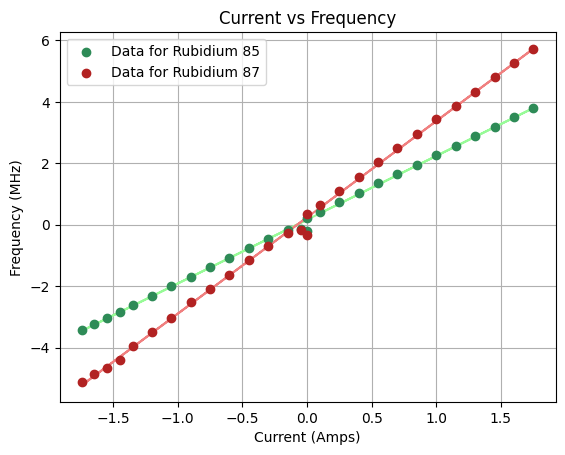

In [349]:
plt.plot(I_f, f_85_f, color = 'palegreen')
plt.title('Current vs Frequency')
plt.scatter(I_f, freq_85_f, color = 'seagreen', zorder = 5, label = 'Data for Rubidium 85')
plt.plot(I_f, f_87_f, color = 'lightcoral')
plt.scatter(I_f, freq_87_f, color = 'firebrick', zorder = 6 , label ='Data for Rubidium 87')
plt.grid(True)
plt.ylabel('Frequency (MHz)')
plt.xlabel('Current (Amps)')
plt.legend()

In [318]:

print(residual_87)
residual_std_error_87 = np.std(residual_87, ddof=2)
residual_std_error_85 = np.std(residual_85, ddof=2)

n = len(freq_85)
#CALCULATING SLOPE ERROR FROM LEAST MEAN SQUARES METHOD
RSS_85 = np.sum(residual_85**2) # Residual sum of squares (RSS) 
Sxx = np.sum((I - np.mean(I))**2) # Spread of x

# Standard error of the slope
slope_error = np.sqrt(RSS_85 / (n - 2)) / np.sqrt(Sxx_85)

print("Slope:", slope_85)
print("Slope Error:", slope_error)



[ 7.92694330e-02  7.95113202e-02  6.22532073e-02  8.99950944e-02
  5.52369816e-02  5.04788687e-02  5.39707558e-02  2.34626430e-02
  1.62045301e-02  4.53781348e-03 -3.31169562e-03 -5.69808481e-04
  9.66356175e-02  8.47807498e-02 -4.83913255e-02 -1.09063401e-01
  4.77645240e-02  2.55064112e-02  2.57482983e-02  7.84901854e-02
  2.12320726e-02  2.14739597e-02  1.67158468e-02  6.95773398e-03
 -5.03003789e-02 -2.48472454e-01  9.99415083e-02 -5.80058492e-01]
Slope: 2.0790836338043532
Slope Error: 0.016824209556538867


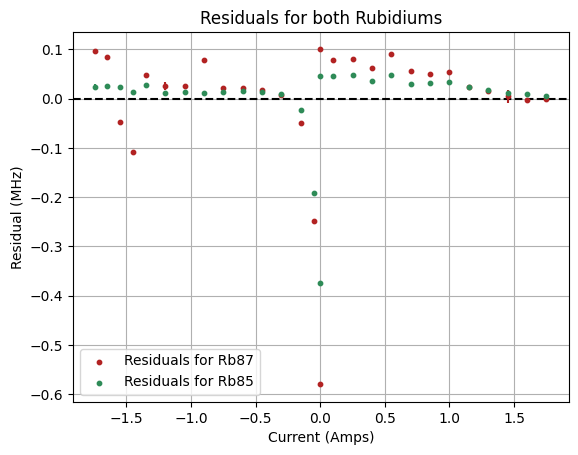

In [348]:
plt.scatter(I_f, residual_87, color = 'firebrick', label = 'Residuals for Rb87', s = 10, zorder = 6)
plt.errorbar(I_f, residual_87, yerr= error_87_f, linestyle='None',color = 'firebrick', zorder = 4)
plt.scatter(I_f, residual_85, label = 'Residuals for Rb85', color = 'seagreen',s = 10,  zorder = 6)
plt.errorbar(I_f, residual_85, yerr= error_85_f, linestyle='None',color = 'seagreen',zorder = 4)
plt.title('Residuals for both Rubidiums')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
plt.ylabel('Residual (MHz)')
plt.xlabel('Current (Amps)')
plt.legend()

In [298]:
indices_87 = np.where(np.abs(residual_87) > .18)[0]
indices_85 = np.where(np.abs(residual_85) > .18)[0]
print(indices_87)

[1]


In [299]:
remove_85 = I[indices_85]
remove_87 = freq_87[indices_87]
print(remove_85, remove_87)

[0.15] [1.1025]


In [350]:
chi_squared_87 = np.sum((residual_87) ** 2 / f_87)
chi_squared_85 = np.sum((residual_85) ** 2 / f_85)
print(chi_squared_85, chi_squared_87)

1.4728389838852018 2.188605070847211


Slope: 2.0791 ± 0.0004
Intercept: 0.1503 ± 0.0003


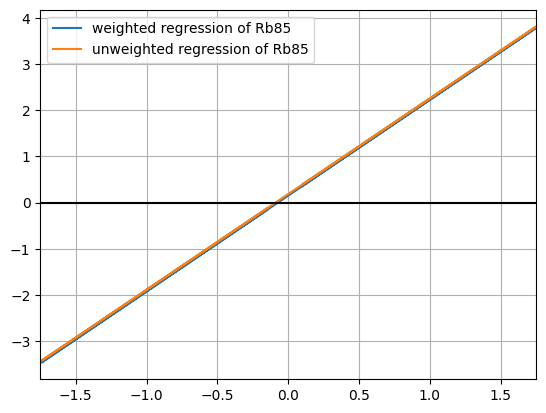

In [301]:
def linear_eq(x, m, b):
    return m * x + b
    
popt_85, pcov_85 = curve_fit(linear_eq, I_f, freq_85_f, sigma=error_85_f, absolute_sigma=True)

slope_85, intercept_85 = popt_85
slope_err_85, intercept_err_85 = np.sqrt(np.diag(pcov_85))

f_85_weighted = linear_eq(I, slope_85, intercept_85) # Predict y values

# OUTPUT RESULTS
print(f"Slope: {slope_85:.4f} ± {slope_err_85:.4f}")
print(f"Intercept: {intercept_85:.4f} ± {intercept_err_85:.4f}")
#print(f"Predicted y: {f_85_weighted}")

plt.plot(I,f_85_weighted, label= 'weighted regression of Rb85')
plt.plot(I, f_85, label = 'unweighted regression of Rb85')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.xlim(-1.75, 1.75)
plt.legend()
plt.grid(True)
plt.show()

f_85_f = 2.0791*I_f + 0.1503
residual_f_85 = freq_85_f - f_85_f


Slope: 3.1016 ± 0.0004
Intercept: 0.1476 ± 0.0004


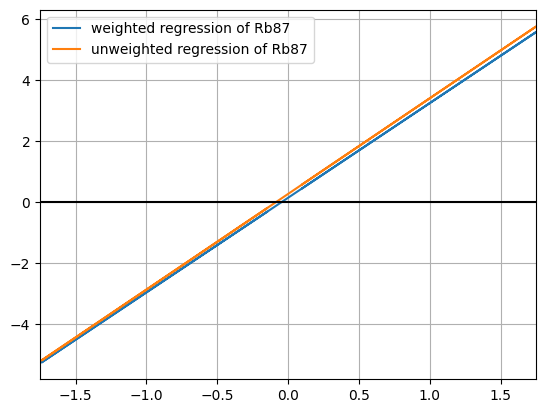

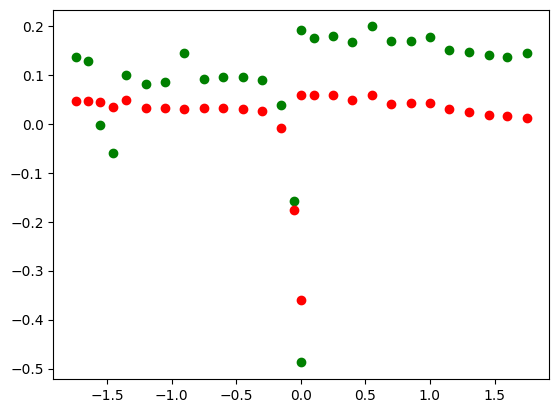

In [302]:
popt_87, pcov_87 = curve_fit(linear_eq, I_f, freq_87_f, sigma=error_87_f, absolute_sigma=True)

slope_87, intercept_87 = popt_87
slope_err_87, intercept_err_87 = np.sqrt(np.diag(pcov_87))

f_87_weighted = linear_eq(I, slope_87, intercept_87) # Predict y values

# OUTPUT RESULTS
print(f"Slope: {slope_87:.4f} ± {slope_err_87:.4f}")
print(f"Intercept: {intercept_87:.4f} ± {intercept_err_87:.4f}")
#print(f"Predicted y: {f_85_weighted}")

plt.plot(I,f_87_weighted, label= 'weighted regression of Rb87')
plt.plot(I, f_87, label = 'unweighted regression of Rb87')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.xlim(-1.75, 1.75)
plt.legend()
plt.grid(True)
plt.show()
7

f_87_f = 3.1016*I_f + .1476
residual_f_87 = freq_87_f - f_87_f

plt.scatter(I_f,residual_f_87, color = 'green',label= 'weighted regression of Rb87')
plt.scatter(I_f,residual_f_85, color = 'red',label= 'weighted regression of Rb87')
